<a href="https://colab.research.google.com/github/Kartik2559/Uber-RCA/blob/main/UBER_(RCA)_Ride_Cancellation_(Airport_City).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.simplefilter('ignore')

sns.set_style('whitegrid')

In [8]:
# from google.colab import files
# upload = files.upload()

In [31]:
uber = pd.read_csv('/content/Uber-RCA.csv', parse_dates = [4,5], dayfirst = True, na_values = 'NA')

# We can also convert datetime datatype "Object" to 'Datetime' by the following method : df["Request timestamp"] = pd.to_datetime(df["Request timestamp"])

In [32]:
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


In [33]:
# Shape of the data

print(f'No. of Rows -> {uber.shape[0]}')
print(f'No. of Columns -> {uber.shape[1]}')

No. of Rows -> 6745
No. of Columns -> 6


In [34]:
# Checking the data type of each column

uber.info(null_counts = False) # Keeping Null_counts as False because we need to see null values seprately

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Dtype         
---  ------             -----         
 0   Request id         int64         
 1   Pickup point       object        
 2   Driver id          float64       
 3   Status             object        
 4   Request timestamp  datetime64[ns]
 5   Drop timestamp     datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.3+ KB


In [35]:
# Checking the No. of null values in each column

uber.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [36]:
# Calculating the percentage of null value in a column

(uber.isnull().sum()/uber.shape[0])*100 # or we could have written it as : uber.isnull().sum() / len(uber) * 100

Request id            0.000000
Pickup point          0.000000
Driver id            39.288362
Status                0.000000
Request timestamp     0.000000
Drop timestamp       58.028169
dtype: float64

Above we can see there are null values for Driver ID and Drop Timestamp its because we dont assign any driver when there are unavailability of the cab and there are no Drop Timestamp because if there is no cabs available and the driver had cancelled the ride there will be no drop time.

In [37]:
# Checking for aany duuplicate data / rows in our data

print(f"No of Duplicate rows in the Data -> {uber.duplicated().sum()}")

No of Duplicate rows in the Data -> 0



# Extracting new features as per our needs from the existing features.

In [38]:
uber["RequestHour"] = uber["Request timestamp"].dt.hour

In [40]:
uber.head(3)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,RequestHour
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9


In [42]:
# Seprating 5 different time slotes according to the Hour of the day

def timeslot(x):
  if x <= 4:
    return 'Dawn'
  elif x <= 9:
    return 'Early Morning'
  elif x <= 16:
    return 'Noon'
  elif x <= 21:
    return 'Late Evening'
  else:
    return 'Night'


# uber['TimeSlot'] = uber['RequestHour'].apply(lambda x: 'Dawn' if x <= 4, '')

uber['TimeSlot'] = uber['RequestHour'].apply(lambda x: timeslot(x))



# Alternative method is as following:

# uber["TimeSlot"] = uber["RequestHour"].apply(lambda x: "Dawn" if x<=4 else ("Early Morning"
#                                                                         if x<=9 else ("Noon"
#                                                                                       if x<=16 else ("Late Evening"
#                                                                                                      if x<=21 else "Night"))))


In [47]:
uber.head(3)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,RequestHour,TimeSlot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,Noon
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,Late Evening
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,Early Morning


In [48]:
# Distinguish the Supply-Demand Gap by a new variable Cab Availability where Supply is when Trip is Completed, all else is Demand

uber['Cab Availability'] = uber['Status'].apply(lambda x: 'Available' if x == 'Trip Completed' else 'Not Available')

In [56]:
uber.sample(5)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,RequestHour,TimeSlot,Cab Availability
6596,6474,Airport,NaN,No Cars Available,2016-07-15 20:15:59,NaT,20,Late Evening,Not Available
6423,6171,City,NaN,No Cars Available,2016-07-15 16:51:23,NaT,16,Noon,Not Available
17,5335,Airport,2.0,Trip Completed,2016-07-14 22:24:13,2016-07-14 23:18:52,22,Night,Available
2938,1642,City,30.0,Cancelled,2016-07-12 07:17:00,NaT,7,Early Morning,Not Available
1040,1454,City,108.0,Trip Completed,2016-07-12 04:54:00,2016-07-12 06:07:00,4,Dawn,Available


In [61]:
uber['Cab Availability'].value_counts(normalize = True) * 100

Not Available    58.028169
Available        41.971831
Name: Cab Availability, dtype: float64

Lets get into analysis part of the data.

Q. What is the Frequency of Requests that get Canceled or show ‘No Cars Available’ in each hour?

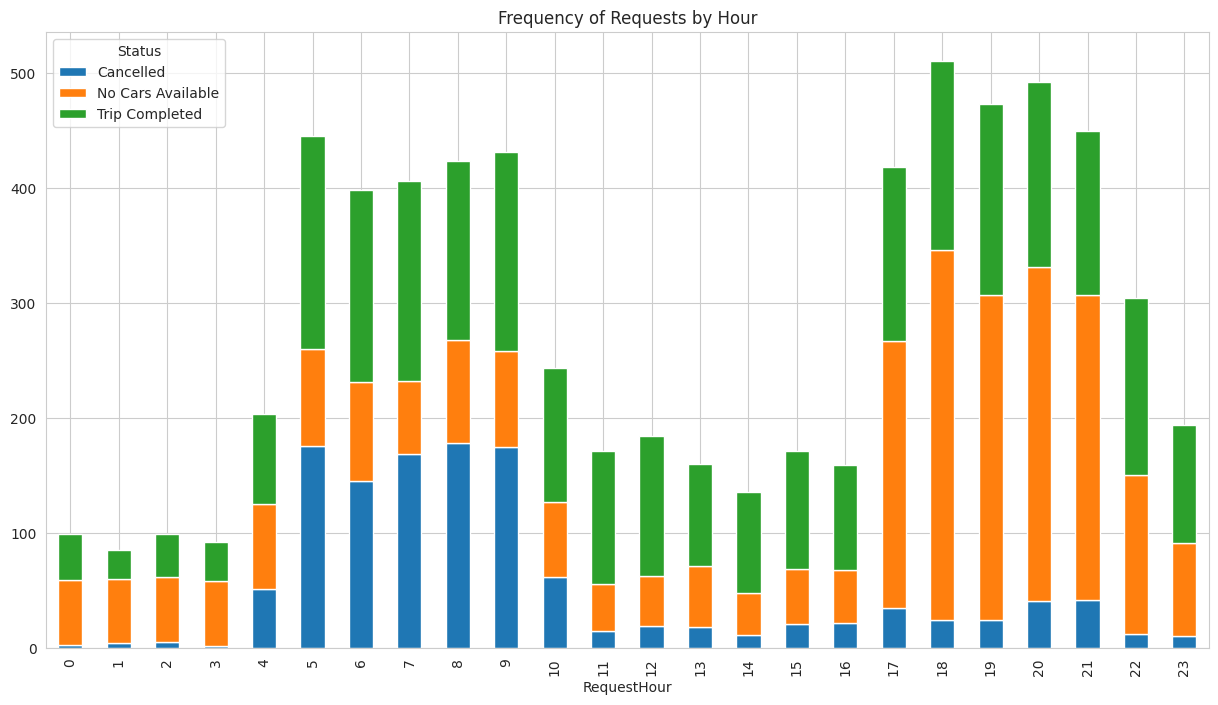

In [69]:
uber.groupby(['RequestHour', 'Status']).size().unstack().plot(kind = 'bar', stacked = True, figsize = (15,8))
plt.title('Frequency of Requests by Hour')
plt.show()

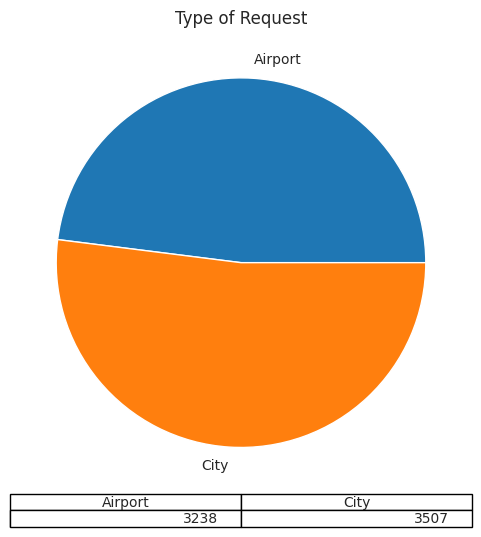

In [76]:
# Types of Requests (city-airport or airport-city)

uber.groupby(['Pickup point']).size().plot(kind = 'pie', figsize = (6,6), table = True)
plt.title('Type of Request')
plt.show()

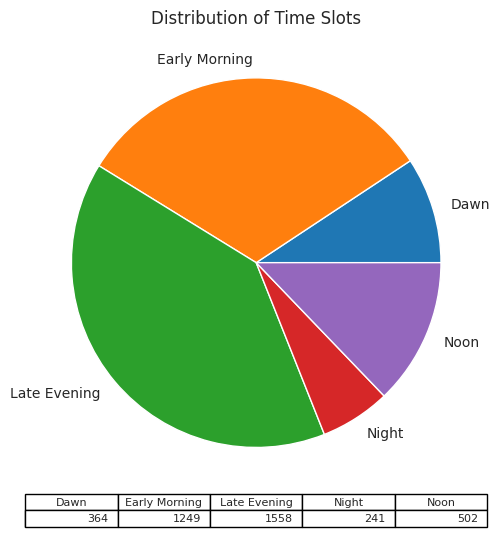

In [80]:
uber[uber['Cab Availability'] == 'Not Available'].groupby(['TimeSlot']).size().plot(kind = 'pie', figsize = (6,6), table = True)
plt.title('Distribution of Time Slots')
plt.show()

Observation: Late Evening and Early morning are not recommended for the Airport - City or vice versa transportation.

Plot the Demand-Supply Gap from Airport to City.

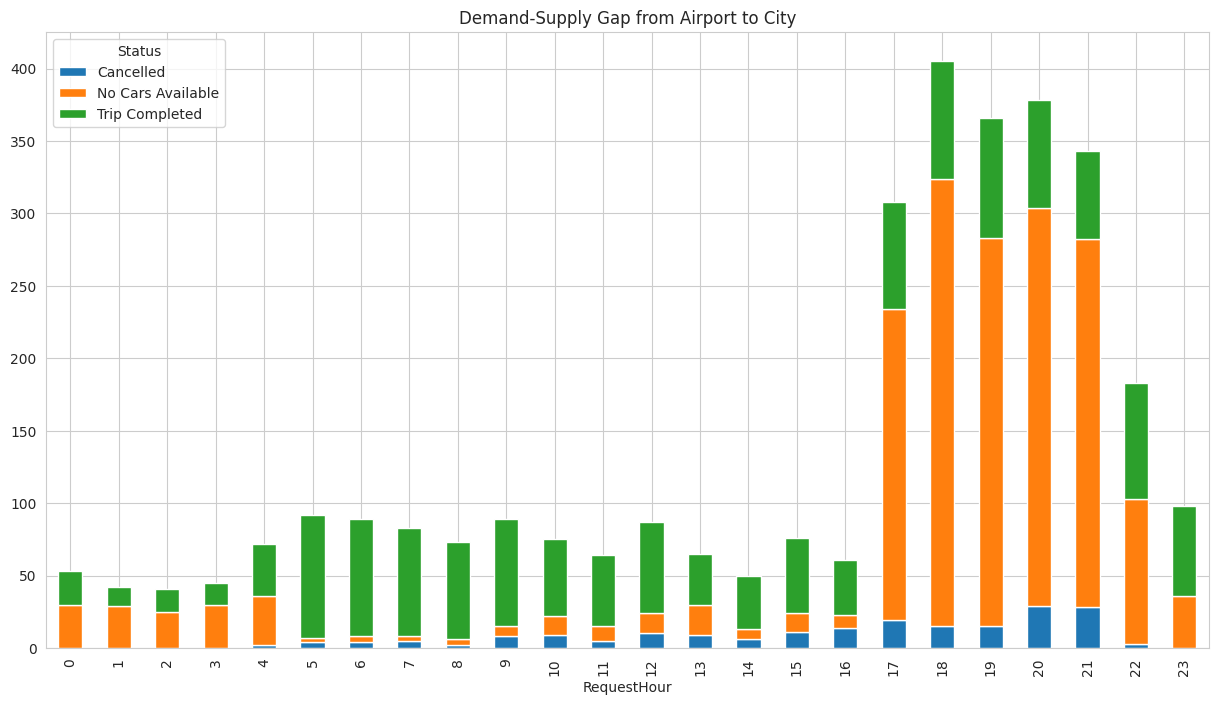

In [91]:
uber[uber['Pickup point']== 'Airport'].groupby(['RequestHour', 'Status']).size().unstack().plot(kind = 'bar', stacked = True, figsize = (15,8))
plt.title("Demand-Supply Gap from Airport to City")
plt.show()

In [ ]:
# Observations:
#  - There are very high demand of the cabs from Airport to City from 1700hrs to 2100hrs
#  - But the availability of cabs are very less and Uber is not able to fulfil the demand

Plot the Demand-Supply Gap from City to Airport.

In [92]:
uber.head(3)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,RequestHour,TimeSlot,Cab Availability
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,Noon,Available
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,Late Evening,Available
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,Early Morning,Available


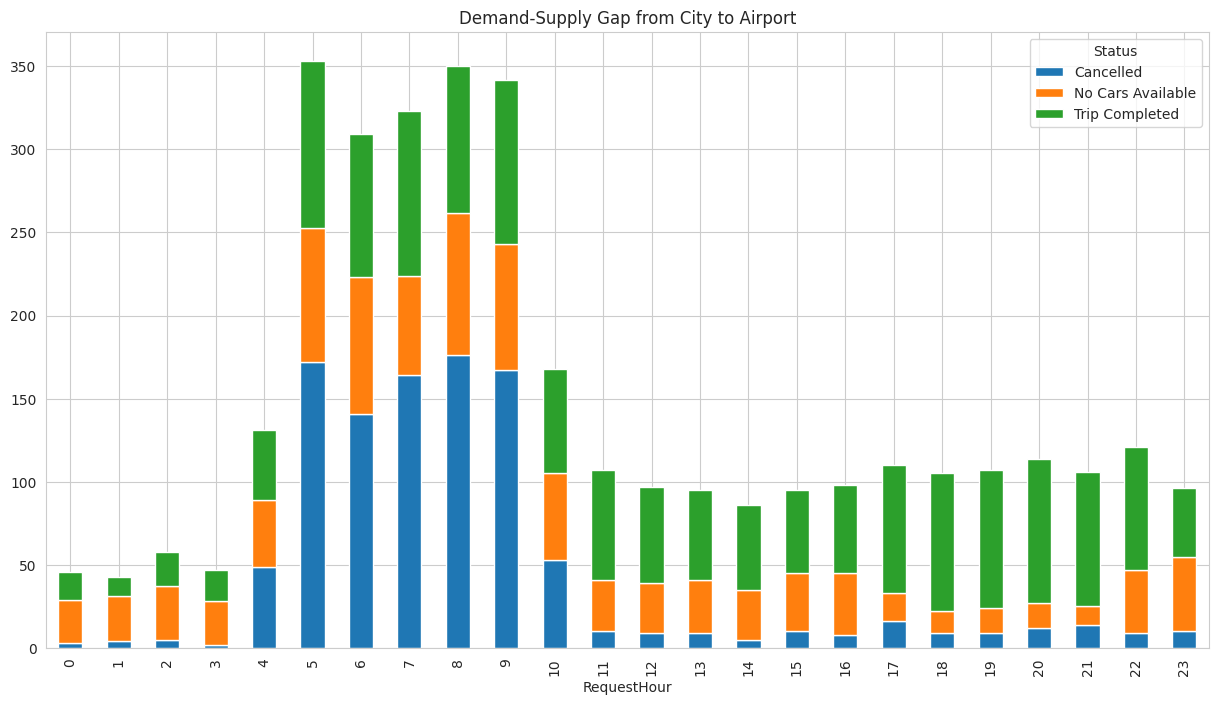

In [97]:
uber[uber['Pickup point'] == 'City'].groupby(['RequestHour', 'Status']).size().unstack().plot(kind = 'bar', stacked = True, figsize = (15,8))
plt.title("Demand-Supply Gap from City to Airport")
plt.show()

In [98]:
# Observation:
#  - There is very high demand for cabs from City to Airport in morning from 0500hrs to 0900hrs
#  - Supply is less due to ride cancillation

In [99]:
uber.head(3)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,RequestHour,TimeSlot,Cab Availability
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,Noon,Available
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,Late Evening,Available
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,Early Morning,Available


Q. What are the Time Slots where the highest gap exists?

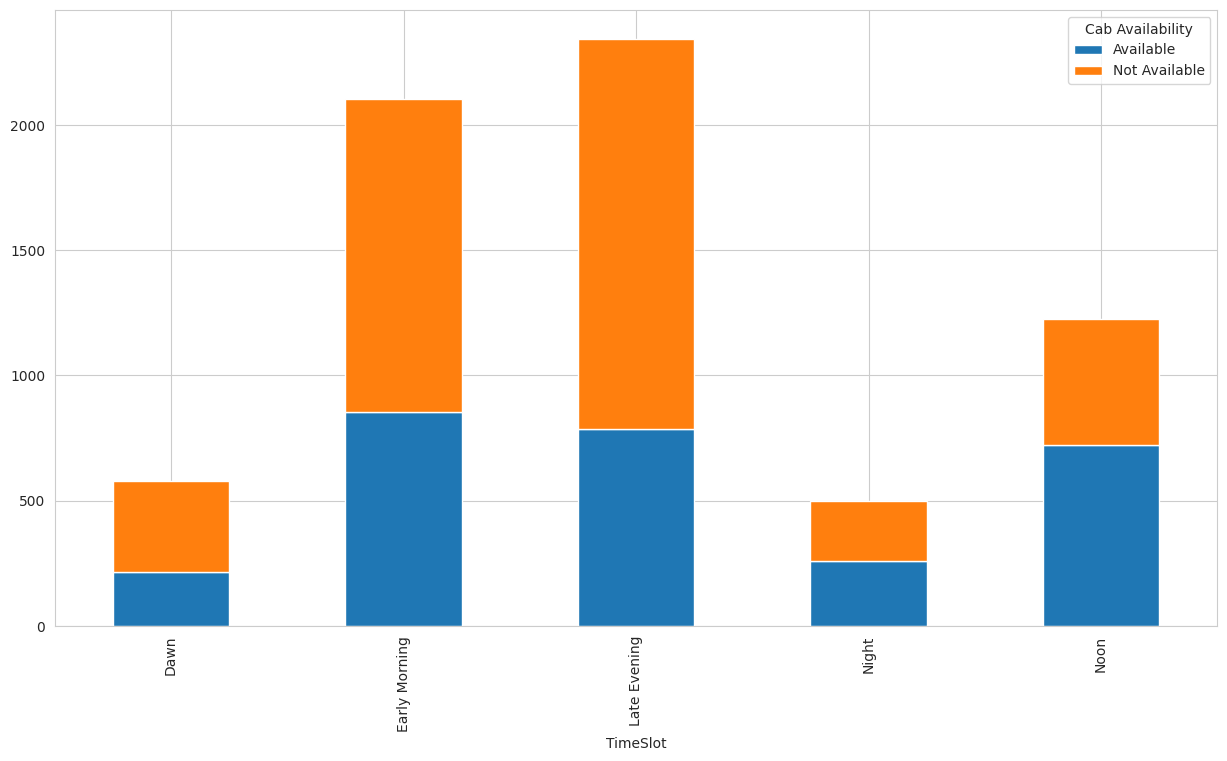

In [103]:
uber.groupby(['TimeSlot', 'Cab Availability']).size().unstack().plot(kind = 'bar', stacked = True, figsize = (15,8))
plt.show()

Observation:
 - Among the assumed time slotes Early Morning and Late Evening time slots show larger gap in Avaiability and Non Availability of rides
 - This means that during morning and late evening the probability of getting cab is very less

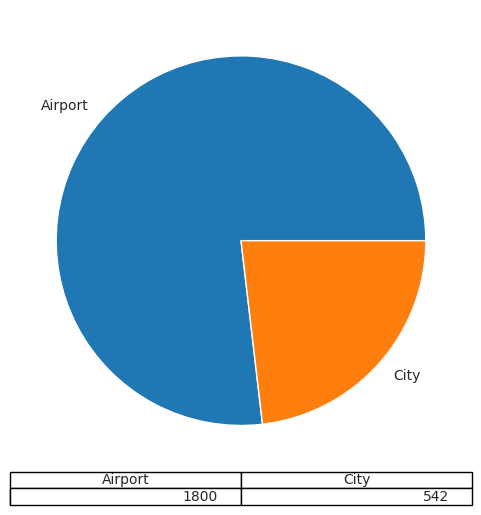

In [108]:
# Types of Requests (city-airport or airport-city) for which the gap is the most severe in the Late Evening time slot -

uber[uber['TimeSlot'] == 'Late Evening'].groupby('Pickup point').size().plot(kind = 'pie', figsize = (6,6), table = True)
plt.show()

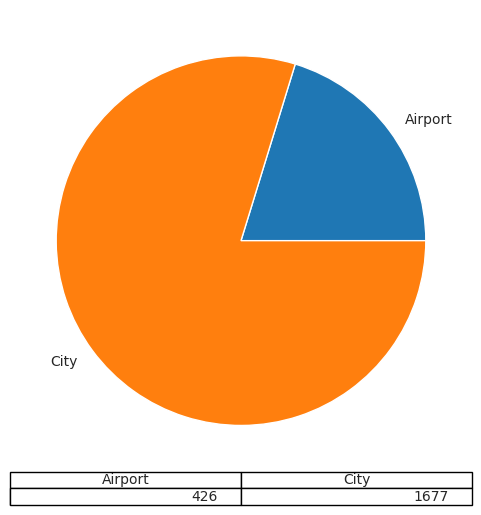

In [109]:
# Types of Requests (city-airport or airport-city) for which the gap is the most severe in the Early Morning time slot -

uber[uber['TimeSlot'] == 'Early Morning'].groupby('Pickup point').size().plot(kind = 'pie', figsize = (6,6), table = True)
plt.show()

---
### Reason for Supply-Demand gap -
---

 * In the Supply-Demand graph from Airport to City, between 5:00 PM to 9:00 PM there is very high demand for cabs because the supply is very low due to ‘No Cars Available’.
 * The ‘No Cars Available’ is due to the fact that in the previous hours fewer people travelled from City – Airport and so fewer cars are available in near Airport.
 * Likewise, in Supply-Demand graph from City – Airport, between 5:00 AM to 9:00 AM, there is very high demand for cabs because the supply is very low due to Ride Cancellations.
 * This is because there were fewer trips to Airport that completed in the previous hours, so now the cabs have to come from a long distance (City) to pickup the passenger and then they have to wait for the passenger’s arrival, so the drivers cancel the trip.

---
### Recommendations -
---

* Awarding incentive for waiting time will encourage the drivers to wait at Airport.

* Drivers could be compensated for taking the night shifts hence covering the 00:00 – 5:00 time slot.

* Seeing this analysis trends, few cabs could be placed in Airports proactively.

* Drivers to be rewarded for the Airport rides making up for the loss in time.

* The cab discovery range to be increased for Airport location, so that the search for cabs would be on a wider range.